<div class= "alert alert-info" role="alert">
    <p style="text-align:center">
    </a>
</p>   
 <h1><center>PageRank and TextRank</center></h1>
<hr></hr>
</div>

<h1>PageRank and TextRank</h1>
    <hr></hr>
<h4>Aim :</h4>Perform PageRank and TextRank using python
</div>


## Import Libraries
Import the libraries you usually use for data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import networkx as nx
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize

In [2]:
# Load the dataset
df = pd.read_csv('disaster_tweets.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


<h3>Exploratory Data Analysis

In [5]:
def length(string):    
    return len(string)
df['length'] = df['text'].apply(length)

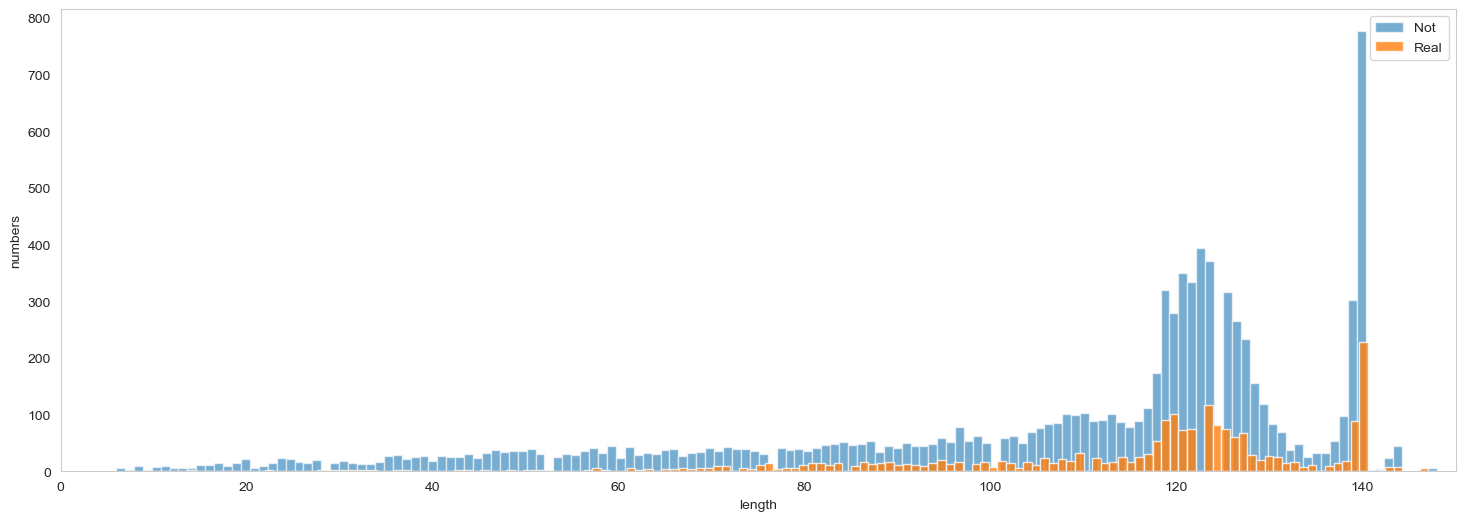

In [6]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(df[df['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(df[df['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

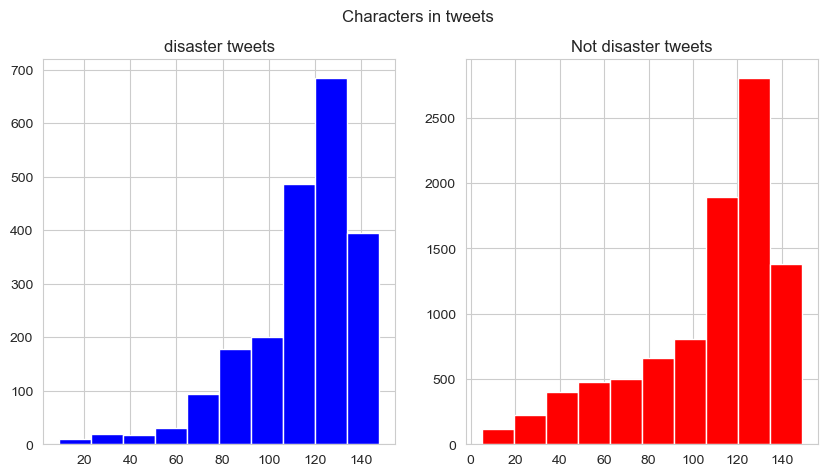

In [7]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=df[df['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [8]:
# Extract tweets as nodes
tweets = df['text'].tolist()

<h3>Preprocessing function for TextRank
    <hr></hr>

In [9]:
def preprocess_text(text):
    """
    Preprocesses text data for TextRank.

    Args:
        text (str): Input text.

    Returns:
        str: Preprocessed text.
    """
    # Tokenize text
    tokens = word_tokenize(text.lower())

    # Remove stopwords and non-alphabetic characters
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    # Join tokens back to text
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text

In [10]:
preprocessed_tweets = [preprocess_text(tweet) for tweet in tweets]

In [11]:
# Create a directed graph using NetworkX
G = nx.DiGraph()

In [12]:
# Create a graph for TextRank (based on the same dataset)
G_text = nx.Graph()

In [10]:
for tweet in preprocessed_tweets:
    tokens = word_tokenize(tweet)
    for i in range(len(tokens)):
        if tokens[i].startswith('@'):
            G.add_edge(tokens[i][1:], tokens[i-1])

In [13]:
# Add edges to the graph based on hashtags in tweets
for tweet in preprocessed_tweets:
    hashtags = [token[1:] for token in word_tokenize(tweet) if token.startswith('#')]
    for hashtag in hashtags:
        G.add_edge(hashtag, tweet)

<h3>Perform PageRank

In [14]:
pagerank_scores = nx.pagerank(G, alpha=0.85)

In [15]:
# Print PageRank scores
print("PageRank Scores:")
for node, score in pagerank_scores.items():
    print(f"{node}: {score}")


PageRank Scores:


In [16]:
# Create a graph for TextRank (based on the same dataset)
G_text = nx.Graph()

In [17]:
# Add edges to the graph based on co-occurrence of words in sentences
for tweet in tweets:
    sentences = sent_tokenize(tweet)
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        for i in range(len(tokens) - 1):
            G_text.add_edge(tokens[i], tokens[i+1])

In [18]:
# Compute term frequency (TF) of words
term_freq = FreqDist()
for tweet in preprocessed_tweets:
    tokens = word_tokenize(tweet)
    term_freq.update(tokens)

In [19]:
# Compute inverse document frequency (IDF) of words
doc_freq = FreqDist()
for word in term_freq.keys():
    for tweet in preprocessed_tweets:
        if word in tweet:
            doc_freq[word] += 1

In [20]:
idf = {}
for word, freq in doc_freq.items():
    idf[word] = np.log(len(tweets) / (freq + 1))

In [22]:
# Compute TextRank scores
text_rank_scores = nx.pagerank(G_text, alpha=0.85, personalization=idf)

In [23]:
# Print TextRank scores
print("TextRank Scores:")
for node, score in text_rank_scores.items():
    print(f"{node}: {score}")

TextRank Scores:
Communal: 3.1366332649929633e-06
violence: 0.00011775960459328209
in: 0.009543771372365664
Bhainsa: 3.789434766085055e-05
,: 0.01757550170731592
Telangana: 4.266506340942277e-05
.: 0.011892209772578446
``: 0.0016821785262693637
Stones: 2.3424999617399653e-05
were: 0.0012250287685467247
pelted: 3.177518155177657e-05
on: 0.004906971902427271
Muslims: 9.956715632561066e-05
': 0.0009861414153565953
houses: 0.0001326313408916527
and: 0.012772966528000272
some: 0.000934871815063697
vehicles: 9.066976832428704e-05
set: 0.00025974790705198767
ablaze…: 7.730020742578733e-06
:: 0.019235445296946735
Section: 1.6751053880148897e-05
144: 5.086405107641195e-06
has: 0.0020140221817175562
been: 0.0011406125496341085
imposed: 2.257644610764788e-05
from: 0.0031782404574985617
January: 0.00016094536586507092
13: 0.00010279812199692884
to: 0.011050173832157392
15: 0.00016256870367087602
after: 0.0014953160802420426
clash: 3.4064107007284155e-05
erupted: 5.521786776477483e-05
between: 0.00

Commission…: 3.325870495461484e-06
🔴Breaking: 2.200095683113344e-06
Oppressive: 5.960192210779965e-06
inj…: 3.2629930274789346e-06
🇺🇳: 5.2088320641813416e-06
Reaction: 5.368112333367563e-06
U.N.…: 3.191580897370806e-06
dembele: 1.899052546564805e-05
velverde: 1.9919508811447697e-05
umtiti: 1.9927320660063278e-05
Suare…: 5.516344640477631e-06
//t.co/AEfuC6uWgW: 1.0695783928484181e-06
Boogie: 3.3905132620219687e-06
//t.co/wHxxDxTrCx: 1.0695783928484181e-06
Calum: 2.055211680364615e-06
Mavropanos: 1.1433133388234684e-05
loaned: 2.6802807505986613e-05
Mustafi: 3.669846675211461e-06
centre-back: 6.66043655598644e-06
Machete: 1.0420955580033406e-05
Hasidic: 5.804568519147981e-06
Rabbi: 5.427241695496726e-06
Hanukkah: 7.788521903367378e-06
//t.co/wHHOS3NkTa: 1.0695783928484181e-06
sacked: 2.6143906244444695e-05
Suarez: 1.902815530457913e-05
9,1992: 5.626092678138733e-06
Khalistani: 5.859773518803119e-06
KupKalan: 3.2624806173910772e-06
Sangrur: 6.594814845439901e-06
Tumblr: 5.495583046042932e

## Conclusion

- We performed PageRank and TextRank algorithms on the Kaggle dataset. 

- For PageRank, we constructed a graph using the dataset and computed the PageRank scores for each node. We then visualized the PageRank scores using a bar chart, which provided insights into the importance of each node in the graph.

- For TextRank, we extracted the text data from the dataset and applied the TextRank algorithm to compute the TextRank scores for each node. We visualized the TextRank scores using a bar chart, which helped us understand the relevance of each node in the text data.

- Overall, both PageRank and TextRank algorithms proved to be effective in analyzing the dataset and identifying important nodes. These algorithms can be valuable tools in various applications such as recommendation systems, text summarization, and social network analysis.